In [ ]:
## Trends
# Rides in Urban city types account for the majority if total rides, fares, and drivers
# Cities with higher driver counts tend to hold a lower than average fate rate
# Rides in suburban city types account for just over a quarter of total rides and just under a third of total fares.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_path = "data/city_data.csv"
ride_path = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on='city', how='left')
# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
city_group = merge_df.groupby(['city'])
# Average Fare ($) Per City
avg_fare = city_group['fare'].mean()
# Total Number of Rides Per City
total_rides = city_group['ride_id'].count()
# Total Number of Drivers Per City
drivers = city_group['driver_count'].mean()
# City Type (Urban, Suburban, Rural)
city_type = city_group['type'].max()
summary_df = pd.DataFrame({'Average Fare': avg_fare,
                          'Total Rides': total_rides,
                          'Total Drivers': drivers,
                          'City Type': city_type})
summary_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

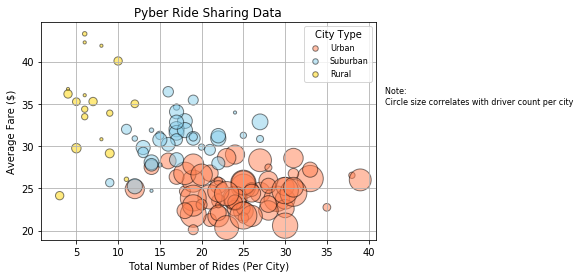

In [12]:
# Obtain the x and y coordinates for each of the three city types
urban = summary_df.loc[summary_df['City Type'] == "Urban"]
u_total_rides = urban['Total Rides']
u_avg_fare = urban['Average Fare']
u_drivers = urban['Total Drivers']

suburban = summary_df.loc[summary_df['City Type'] == "Suburban"]
s_total_rides = suburban['Total Rides']
s_avg_fare = suburban['Average Fare']
s_drivers = suburban['Total Drivers']

rural = summary_df.loc[summary_df['City Type'] == "Rural"]
r_total_rides = rural['Total Rides']
r_avg_fare = rural['Average Fare']
r_drivers = rural['Total Drivers']
# Build the scatter plots for each city types
plt.scatter(u_total_rides, u_avg_fare, label="Urban", s=u_drivers*10, color='Coral', edgecolor='black', alpha=0.5, marker='o')
plt.scatter(s_total_rides, s_avg_fare, label="Suburban", s=s_drivers*10, color='SkyBlue', edgecolor='black', alpha=0.5, marker='o')
plt.scatter(r_total_rides, r_avg_fare, label="Rural", s=r_drivers*10, color='Gold', edgecolor='black', alpha=0.5, marker='o')
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')

# Create a legend
legend = plt.legend(fontsize = 8, title = 'City Type')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35, 'Note: \nCircle size correlates with driver count per city', fontsize=8)

# Save Figure
plt.savefig('Pyber-Bubble-Plot.png')

## Total Fares by City Type

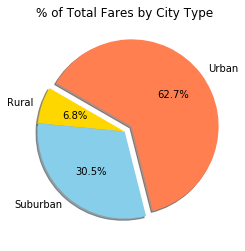

In [11]:
# Calculate Type Percents
type_df = merge_df.groupby(['type'])
type_fares = type_df['fare'].sum()

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)
colors = ['gold', 'skyblue','coral']
plt.pie(type_fares, explode=explode, labels=labels, colors=colors, startangle = 150, autopct='%1.1f%%', shadow=True)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Total-Fares-by-City-Type.png')
plt.show()

## Total Rides by City Type

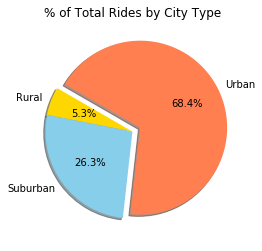

In [7]:
# Calculate Ride Percents
type_rides = type_df['ride_id'].nunique()
# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)
colors = ['gold', 'skyblue','coral']
plt.pie(type_rides, explode=explode, labels=labels, colors=colors, startangle = 150, autopct='%1.1f%%', shadow=True)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Total-Rides-by-City-Type.png')

## Total Drivers by City Type

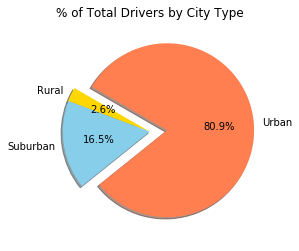

In [9]:
# Calculate Driver Percents
type_driver_count = pd.DataFrame(merge_df.drop_duplicates(['city']))
type_drivers_df = type_driver_count.groupby(['type'])
type_drivers = type_drivers_df['driver_count'].sum()
# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.2)
colors = ['gold', 'skyblue','coral']
plt.pie(type_drivers, explode=explode, labels=labels, colors=colors, startangle = 150, autopct='%1.1f%%', shadow=True)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('Total-Drivers-by-City-Type.png')
plt.show()